# **Contents**
[Importing Libraries and Packages](#p2)  
[Loading and Viewing Data Set](#p3)  
[Split data between _Prospect versus _Existing Customer](#p4)  
[Create New Customer(prospect) Model](#p5)  
[Create Recency Variables by Propsect](#p6)  

[**Placeholder for confusion matrix and feature weights for models**](#p13)
<a id="p1"></a>

#  **Importing Libraries and Packages**

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns

from matplotlib import pyplot as plt
import missingno as msno  #missing data
from dtreeviz.trees import *  #decision tree visualization
from IPython.display import Image, display_svg
sns.set_style("whitegrid")
%matplotlib inline

# from dtreeviz.trees import *
# from IPython.display import Image, display_svg

# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder

import os 
# from sklearn.preprocessing import StandardScaler  
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import make_scorer, accuracy_score 
# from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")
#print(os.listdir("../input"))

#  **Loading and Viewing Data Set**
<a id="p3"></a>

In [2]:
# Print options
np.set_printoptions(precision=4, threshold=10000, linewidth=160, edgeitems=999, suppress=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 160)
pd.set_option('expand_frame_repr', False)
pd.set_option('precision', 4)
""" fix flow to 3 places"""
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
print(os.listdir("/Volumes/GoogleDrive/My Drive/data/cvdata"))

['oppty_sampling_jun25.sql', 'getting_data.ipynb', 'feature_engineering (june19).ipynb', 'oppty_sampling_jun25 .csv', 'oppty_sampling_jun26.csv', 'tiny_pipe_test.ipynb', 'data_tiny', 'prospect_pipe_jul10.html', 'prospect_pipe_jul10.ipynb', 'role.csv', 'oppty_sample_jul15.csv', 'accttosalespersonstart.csv', 'oppty_sample_jul16.csv', 'oppty_sample_jul18.csv', 'cv_cloud_cust_usage.sql', 'cvcloud_cus_usageJul2019.csv', 'cvLicensing_map.sql', 'lic_to_sf_jul25.csv', 'oppty_sample_jul18.sql', 'oppty_sample_jul29.csv', 'cases_sample_jul29.csv', 'Icon\r']


In [4]:
datadirectory = "/Volumes/GoogleDrive/My Drive/data/cvdata/"

In [5]:
# read opportunity table, has 4 years of oppty.  measurement window 2017-2019 FY
data = pd.read_csv(datadirectory+"oppty_sample_jul29.csv",low_memory=False )
data.head()

,Unnamed: 0,Opp_ID,Opp_CreatedDate,InflowDate__c,CloseDate,FirstWinDate,daysfromcreate,StageName,AccountId,Software_Amount__c,AcquisitionType__c,LastUpdate,LastForecastCategory,LastStageName,NewBusinessAtClose,WonOpp,Software_Amount__c.1,hasMtnRenewal,No_Software_Amount__c,NewOrExistingCustomer__c,CreatorRole__c,DealLedBy__c,SalesProcess__c,PartnerValueAdd__c,SDNote__c,New_Project_or_Add_on_Revenue__c,Number_of_Servers_for_THIS_Opportunity__c,OpportunityDescriptionComments__c,RelationshipType_Text__c,ReportingLevel0__c,ReportingLevel1__c,ReportingLevel2__c,Industry,Segment__c,NumberOfEmployees,AnnualRevenue,Start_Date_at_CommVault__c
0,0,0061W00000oga5sQAA,2017-09-26 14:00:18.0000000,2017-09-26 00:00:00.0000000,2018-02-22 00:00:00.0000000,2013-06-13 00:00:00.0000000,149,Closed / Lost,0014000000FFOT8AAP,"9,000.00",Perpetual,2018-02-08 13:36:09.0000000,Pipeline,Qualifying,No,0,"9,000.00",0,0.00,Existing,NaN,Partner & CVLT,Add-on Only,NaN,NaN,Add-on Revenue,NaN,NaN,End User - Customer,Americas,Canada,Canada Central & West,Manufacturing,Mid-Market,200.00,"11,667,786.00",2011-11-07 00:00:00.0000000
1,1,0061W00000oggimQAA,2017-09-27 10:58:02.0000000,2017-09-27 00:00:00.0000000,2017-11-30 00:00:00.0000000,2003-06-20 00:00:00.0000000,64,Closed/Won,0014000000FFPo9AAH,"1,528.66",Perpetual,2017-11-30 15:07:14.0000000,BestCase,Selection,No,1,"1,528.66",0,0.00,Existing,"Inside Sales Representative, Commercial",Partner & CVLT,Quick,NaN,NaN,Add-on Revenue,NaN,Adding qty 1 of MM-TDR-1 to environment,End User - Customer,Americas,Canada,Canada East,Transportation,Large Enterprise,"1,900.00","450,000,000.00",2011-11-07 00:00:00.0000000
2,2,0061W00000ogaVvQAI,2017-09-26 14:42:44.0000000,2017-09-26 00:00:00.0000000,2017-10-05 00:00:00.0000000,2011-04-21 00:00:00.0000000,9,Closed/Won,0014000000TBI7lAAH,"11,063.79",Perpetual,2017-10-05 13:36:04.0000000,BestCase,Selection,No,1,"11,063.79",0,0.00,Existing,Enterprise Account Executive,Partner & CVLT,Add-on Only,NaN,NaN,Add-on Revenue,NaN,NaN,End User - Customer,Americas,US West & LATAM,West,Banking & Insurance,Mid-Market,"1,200.00",0.00,2015-06-22 00:00:00.0000000
3,3,0061W00000ogbwNQAQ,2017-09-26 17:12:34.0000000,2017-09-26 00:00:00.0000000,2017-10-18 00:00:00.0000000,2012-05-09 00:00:00.0000000,22,Closed/Won,0014000000ZuWjIAAV,"17,604.15",Perpetual,2017-10-18 11:33:54.0000000,BestCase,Selection,No,1,"17,604.15",0,0.00,Existing,Inside Sales Representative,CVLT,Add-on Only,NaN,Chris is leading. This is a socket add on.,Add-on Revenue,NaN,NaN,End User - Customer,Americas,US West & LATAM,West,Healthcare,Enterprise,"1,600.00","369,025,810.00",2010-10-04 00:00:00.0000000
4,4,0061W00000ogdefQAA,2017-09-26 23:06:18.0000000,2017-09-26 00:00:00.0000000,2017-10-31 00:00:00.0000000,NaN,35,Closed / Lost,0014000001qnEKNAA2,"5,000.00",Perpetual,2017-10-05 21:27:15.0000000,Pipeline,Qualifying,Yes,0,"5,000.00",0,0.00,New,"Inside Sales Representative, Commercial",Partner & CVLT,Extended,NaN,NaN,New Project,NaN,NaN,Reseller-Candidate;Service Provider-Candidate,APAC,ASEAN,NaN,NaN,SMB,nan,nan,2016-09-26 00:00:00.0000000


In [6]:
#remove column
del data['Unnamed: 0']
data.head(1)

,Opp_ID,Opp_CreatedDate,InflowDate__c,CloseDate,FirstWinDate,daysfromcreate,StageName,AccountId,Software_Amount__c,AcquisitionType__c,LastUpdate,LastForecastCategory,LastStageName,NewBusinessAtClose,WonOpp,Software_Amount__c.1,hasMtnRenewal,No_Software_Amount__c,NewOrExistingCustomer__c,CreatorRole__c,DealLedBy__c,SalesProcess__c,PartnerValueAdd__c,SDNote__c,New_Project_or_Add_on_Revenue__c,Number_of_Servers_for_THIS_Opportunity__c,OpportunityDescriptionComments__c,RelationshipType_Text__c,ReportingLevel0__c,ReportingLevel1__c,ReportingLevel2__c,Industry,Segment__c,NumberOfEmployees,AnnualRevenue,Start_Date_at_CommVault__c
0,0061W00000oga5sQAA,2017-09-26 14:00:18.0000000,2017-09-26 00:00:00.0000000,2018-02-22 00:00:00.0000000,2013-06-13 00:00:00.0000000,149,Closed / Lost,0014000000FFOT8AAP,"9,000.00",Perpetual,2018-02-08 13:36:09.0000000,Pipeline,Qualifying,No,0,"9,000.00",0,0.00,Existing,NaN,Partner & CVLT,Add-on Only,NaN,NaN,Add-on Revenue,NaN,NaN,End User - Customer,Americas,Canada,Canada Central & West,Manufacturing,Mid-Market,200.00,"11,667,786.00",2011-11-07 00:00:00.0000000


In [7]:
# dfContacts = pd.read_csv(datadirectory+"role.csv",low_memory=False )
# dfContacts.head()

In [8]:
print("size of data from oppty table", data.shape)
# print("size of data from contacts per opportunity", dfContacts.shape)

size of data from oppty table (92839, 36)


In [9]:
# data2 = pd.merge(data, dfContacts, how='left', left_on = 'Opp_ID', right_on = 'opportunityid')

In [10]:
# data2.shape

In [11]:
#del redundant columns
all_columns = list(data.columns)
print(all_columns)

['Opp_ID', 'Opp_CreatedDate', 'InflowDate__c', 'CloseDate', 'FirstWinDate', 'daysfromcreate', 'StageName', 'AccountId', 'Software_Amount__c', 'AcquisitionType__c', 'LastUpdate', 'LastForecastCategory', 'LastStageName', 'NewBusinessAtClose', 'WonOpp', 'Software_Amount__c.1', 'hasMtnRenewal', 'No_Software_Amount__c', 'NewOrExistingCustomer__c', 'CreatorRole__c', 'DealLedBy__c', 'SalesProcess__c', 'PartnerValueAdd__c', 'SDNote__c', 'New_Project_or_Add_on_Revenue__c', 'Number_of_Servers_for_THIS_Opportunity__c', 'OpportunityDescriptionComments__c', 'RelationshipType_Text__c', 'ReportingLevel0__c', 'ReportingLevel1__c', 'ReportingLevel2__c', 'Industry', 'Segment__c', 'NumberOfEmployees', 'AnnualRevenue', 'Start_Date_at_CommVault__c']


In [12]:
new_columns = ['WonOpp','Opp_ID','AccountId','Opp_CreatedDate','InflowDate__c','CloseDate','FirstWinDate','daysfromcreate',
'StageName','Software_Amount__c','hasMtnRenewal','AcquisitionType__c','LastUpdate',
'LastForecastCategory','LastStageName','RelationshipType_Text__c','ReportingLevel0__c','ReportingLevel1__c',
'Industry','NumberOfEmployees','AnnualRevenue','Start_Date_at_CommVault__c']

In [13]:
new_data = data[new_columns].copy()

In [14]:
new_data.shape

(92839, 22)

In [15]:
new_data.sample(10)

,WonOpp,Opp_ID,AccountId,Opp_CreatedDate,InflowDate__c,CloseDate,FirstWinDate,daysfromcreate,StageName,Software_Amount__c,hasMtnRenewal,AcquisitionType__c,LastUpdate,LastForecastCategory,LastStageName,RelationshipType_Text__c,ReportingLevel0__c,ReportingLevel1__c,Industry,NumberOfEmployees,AnnualRevenue,Start_Date_at_CommVault__c
24888,0,0061W000017z1yLQAQ,0011W00001tQdtsQAC,2019-02-21 10:01:30.0000000,2019-02-21 00:00:00.0000000,2019-03-24 00:00:00.0000000,2018-03-29 00:00:00.0000000,31,Closed / Lost,"5,000.00",0,Subscription,2019-02-24 03:58:39.0000000,Pipeline,Motivation,End User - Customer,EMEA,Large National,Other,0.00,0.00,2016-05-01 00:00:00.0000000
57156,1,0064000000jGbhXAAS,0014000000SneB2AAJ,2016-05-10 04:03:55.0000000,2016-05-10 00:00:00.0000000,2016-06-30 00:00:00.0000000,2014-12-23 00:00:00.0000000,51,Closed/Won,"13,501.21",0,Perpetual,2016-06-30 11:55:45.0000000,BestCase,Selection,End User - Customer,EMEA,Large National,Wholesale & Retail,"23,063.00","2,383,000,000.00",2015-08-17 00:00:00.0000000
39660,1,0064000000fz4QOAAY,0014000001ZkXL9AAN,2015-08-23 22:49:27.0000000,2015-08-24 00:00:00.0000000,2016-06-29 00:00:00.0000000,2016-06-29 00:00:00.0000000,311,Closed/Won,"13,671.45",0,Perpetual,2016-06-10 13:02:24.0000000,BestCase,Selection,End User - Customer,APAC,Japan,Media,676.00,"117,103,954.00",2014-07-11 00:00:00.0000000
62684,1,0064000000kMhOsAAK,0014000000TBHzPAAX,2016-10-06 14:34:37.0000000,2016-10-06 00:00:00.0000000,2016-12-01 00:00:00.0000000,2015-03-28 00:00:00.0000000,56,Closed/Won,"3,025.71",0,Perpetual,2016-12-01 15:13:53.0000000,BestCase,Selection,End User - Customer,Americas,US West & LATAM,Healthcare,500.00,"145,690,000.00",2010-07-06 00:00:00.0000000
74617,0,0064000000naKKMAA2,0014000000leSLRAA2,2017-03-01 13:10:59.0000000,2017-03-30 00:00:00.0000000,2018-05-01 00:00:00.0000000,NaN,426,Closed / Lost,"25,000.00",0,Perpetual,2017-11-21 15:22:14.0000000,Pipeline,Qualifying,End User - Prospect,Americas,US West & LATAM,Communications,"7,500.00","75,000,000.00",2016-11-28 00:00:00.0000000
13779,1,0061W00000zxJr1QAE,0014000001Zkb1eAAB,2018-05-14 21:09:32.0000000,2018-05-14 00:00:00.0000000,2018-05-29 00:00:00.0000000,2018-05-29 00:00:00.0000000,15,Closed/Won,"3,755.07",1,Perpetual,2018-05-18 11:08:16.0000000,BestCase,Selection,End User - Customer,APAC,Japan,Wholesale & Retail,65.00,"42,208,867.00",2014-02-10 00:00:00.0000000
33341,1,0064000000dOSYBAA4,00140000011pcNvAAI,2015-02-24 19:12:58.0000000,2015-02-25 00:00:00.0000000,2017-04-28 00:00:00.0000000,2015-06-22 00:00:00.0000000,794,Closed/Won,"8,602.35",0,Utility,2015-06-19 09:51:17.0000000,Pipeline,Qualifying,Service Provider-Contracted,APAC,ANZ,Technology,5.00,0.00,2016-02-15 00:00:00.0000000
90384,0,0064000000ncL2qAAE,0014000000nsBhKAAU,2017-04-06 20:52:59.0000000,2017-04-06 00:00:00.0000000,2017-06-08 00:00:00.0000000,NaN,63,Closed / Lost,"40,000.00",0,Perpetual,2017-04-06 21:23:03.0000000,Pipeline,Solution Mapping,End User - Prospect,APAC,Korea,Communications,600.00,nan,2012-09-03 00:00:00.0000000
46477,1,0064000000haBnRAAU,0014000000FFNP4AAP,2015-12-23 12:06:06.0000000,2015-12-23 00:00:00.0000000,2015-12-23 00:00:00.0000000,2010-06-29 00:00:00.0000000,0,Closed/Won,"8,069.23",0,Perpetual,2015-12-23 12:10:59.0000000,BestCase,Selection,Service Provider-Contracted,EMEA,Global Enterprise,Consulting,12.00,"25,000,000,000.00",2015-11-01 00:00:00.0000000
14911,1,0061W00000y1oPIQAY,0014000000OtT0WAAV,2018-04-04 02:33:40.0000000,2018-04-04 00:00:00.0000000,2019-02-17 00:00:00.0000000,2010-03-25 00:00:00.0000000,319,Closed/Won,"10,894.56",0,Utility,2019-02-19 00:34:05.0000000,Forecast,Decision,Service Provider-Contracted,APAC,ANZ,Technology,3.00,"709,483.00",2018-06-18 00:00:00.0000000


In [16]:
#view laststage category for sample.  
new_data.loc[new_data['StageName'] == 'Closed/Won'].sample(20)

,WonOpp,Opp_ID,AccountId,Opp_CreatedDate,InflowDate__c,CloseDate,FirstWinDate,daysfromcreate,StageName,Software_Amount__c,hasMtnRenewal,AcquisitionType__c,LastUpdate,LastForecastCategory,LastStageName,RelationshipType_Text__c,ReportingLevel0__c,ReportingLevel1__c,Industry,NumberOfEmployees,AnnualRevenue,Start_Date_at_CommVault__c
33348,1,0064000000etprRAAQ,0014000000FFOmFAAX,2015-04-27 15:44:05.0000000,2015-04-27 00:00:00.0000000,2015-09-29 00:00:00.0000000,2006-10-23 00:00:00.0000000,155,Closed/Won,"337,669.49",0,Utility,2015-09-20 22:46:53.0000000,BestCase,Selection,Service Provider-Contracted,Americas,SP,Consulting,"2,700.00","1,660,000,000.00",2007-10-29 00:00:00.0000000
56340,1,0064000000j1RkjAAE,0014000000YvjwbAAB,2016-06-19 19:54:00.0000000,2016-06-20 00:00:00.0000000,2016-06-19 00:00:00.0000000,2011-09-07 00:00:00.0000000,0,Closed/Won,"6,567.66",0,Perpetual,2016-06-19 19:58:09.0000000,BestCase,Selection,End User - Customer,APAC,ANZ,Media,"1,360.00","1,093,890,000.00",2014-05-12 00:00:00.0000000
62385,1,0064000000k6WuzAAE,0014000000vZc5eAAC,2016-08-18 07:44:35.0000000,2016-08-18 00:00:00.0000000,2016-08-31 00:00:00.0000000,2016-03-21 00:00:00.0000000,13,Closed/Won,"14,877.00",0,Perpetual,2016-08-24 10:41:32.0000000,BestCase,Selection,End User - Former Customer,Americas,US East,Legal,160.00,"25,000,000.00",2011-10-03 00:00:00.0000000
17339,1,0061W000011RwHkQAK,0014000000mUCImAAO,2018-07-29 19:01:38.0000000,2018-07-29 00:00:00.0000000,2019-03-22 00:00:00.0000000,2015-03-27 00:00:00.0000000,236,Closed/Won,"14,730.62",0,Perpetual,2019-03-15 10:06:35.0000000,Forecast,Decision,End User - Customer,APAC,ANZ,Media,913.00,"308,280,419.00",2017-03-01 00:00:00.0000000
15730,1,0061W00000uCgjxQAC,0014000001lktkrAAA,2017-12-05 11:23:34.0000000,2018-02-07 00:00:00.0000000,2018-02-08 00:00:00.0000000,2017-10-31 00:00:00.0000000,65,Closed/Won,"2,655.31",0,Utility,2017-12-07 07:33:45.0000000,Pipeline,Sales Ready Lead,Aggregator-Contracted;Distributor-Contracted;R...,EMEA,MESAT,Wholesale & Retail,0.00,0.00,2016-06-06 00:00:00.0000000
74826,1,0064000000mTVLuAAO,0014000000eWIwVAAW,2017-05-08 01:56:58.0000000,2017-05-08 00:00:00.0000000,2017-07-21 00:00:00.0000000,2014-07-23 00:00:00.0000000,74,Closed/Won,"20,596.17",0,Perpetual,2017-07-19 12:16:50.0000000,BestCase,Selection,Service Provider-Contracted,EMEA,MESAT,Technology,nan,nan,2016-04-04 00:00:00.0000000
4733,1,0061W00000u2f5IQAQ,0011W00001rE2TDQA0,2018-04-17 15:19:57.0000000,2018-04-17 00:00:00.0000000,2018-04-18 00:00:00.0000000,2018-04-18 00:00:00.0000000,1,Closed/Won,"3,796.20",0,Perpetual,2018-04-27 08:13:19.0000000,BestCase,Selection,End User - Customer,EMEA,East Europe,Construction,"12,740.00","214,361,993.00",2017-02-06 00:00:00.0000000
63822,1,0064000000iCaIQAA0,0014000000TBJRhAAP,2016-04-05 09:15:54.0000000,2016-04-05 00:00:00.0000000,2017-03-31 00:00:00.0000000,2012-08-23 00:00:00.0000000,360,Closed/Won,"30,049.80",0,Perpetual,2017-03-22 21:55:15.0000000,BestCase,Selection,End User - Customer,Americas,US East,Consulting,501.00,0.00,2011-10-03 00:00:00.0000000
4542,1,0061W00000u2QW5QAM,0014000000YAJAiAAP,2018-04-12 23:25:43.0000000,2018-04-17 00:00:00.0000000,2018-04-18 00:00:00.0000000,2013-11-11 00:00:00.0000000,6,Closed/Won,"99,011.85",0,Utility,2018-04-18 06:37:35.0000000,BestCase,Selection,Service Provider-Contracted,APAC,ANZ,Technology,25.00,"10,263,664.00",2014-06-03 00:00:00.0000000
68451,1,0064000000lh2yiAAA,00140000016Q0tUAAS,2016-11-17 07:02:25.0000000,2016-11-17 00:00:00.0000000,2016-11-23 00:00:00.0000000,2014-12-31 00:00:00.0000000,6,Closed/Won,"5,467.08",0,Perpetual,2016-11-23 11:00:15.0000000,BestCase,Selection,End User - Customer,EMEA,Territory,Banking & Insurance,750.00,"960,889,088.00",2015-05-18 00:00:00.0000000


In [17]:
#lower case and adjust column formats
new_data.columns = new_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

## pandas type converstions: 
dates to pandas datetime formats

In [18]:
new_data['opp_createddate'] = pd.to_datetime(new_data['opp_createddate'], errors='coerce') #replaces errors with NAT
new_data['inflowdate__c'] = pd.to_datetime(new_data['inflowdate__c'], errors='coerce') #replaces errors with NAT
new_data['closedate'] = pd.to_datetime(new_data['closedate'], errors='coerce') #replaces errors with NAT
new_data['firstwindate'] = pd.to_datetime(new_data['firstwindate'], errors='coerce') #replaces errors with NAT
new_data['start_date_at_commvault__c'] = pd.to_datetime(new_data['start_date_at_commvault__c'], errors='coerce')

In [19]:
new_data.shape

(92839, 22)

# **Split data between _Prospect versus _Existing Customer** 
<a id="p4"></a>

>Prospect is calculated as 'firstwindate' is null or 'closedate' = 'firstwinddate' opporunity 

In [20]:
new_data['firstwindate'].sample(5)

65262   2005-09-30
13276          NaT
89435          NaT
49699          NaT
32890   2012-04-20
Name: firstwindate, dtype: datetime64[ns]

In [21]:
# capture first win dates that match close date 
new_data['is_firstwindate'] = (new_data.firstwindate==new_data.closedate).astype(int)
print("new customer wins,\n firstwindate = closedate", new_data['is_firstwindate'].sum())

new customer wins,
 firstwindate = closedate 8307


In [22]:
new_data['no_firstwindate'] = new_data.firstwindate.isnull().astype(int)
print("additional prospects,\n total with null as firstwindate \n", new_data.firstwindate.isnull().sum())

additional prospects,
 total with null as firstwindate 
 32229


In [23]:
# create new column for prospect versus existing customer
new_data['cust_model'] = ((new_data['no_firstwindate'] + new_data['is_firstwindate']) > 0).astype(int)
print("total opporunities where new firstwindate is missing or closedate matches firstwindate\n",new_data['cust_model'].sum())

total opporunities where new firstwindate is missing or closedate matches firstwindate
 40536


# **Create Customer and Prospect Model Datasets:**  
<a id="p5"></a>

In [24]:
# prospect dataset
is_prospect =  new_data['cust_model']==1
data_prospect = new_data[is_prospect].copy()
print("Size of New Customer Dataset", data_prospect.shape)

Size of New Customer Dataset (40536, 25)


In [25]:
# existing customer dataset
is_existing =  new_data['cust_model']==0
data_existing = new_data[is_existing].copy()
print("Size of Existing Customer Dataset", data_existing.shape)

Size of Existing Customer Dataset (52303, 25)


# **Create Opportunity Recency Variables Prospects

In [26]:
#recency dataframe 
tx_day_order_p = data_prospect[['accountid','inflowdate__c', 'closedate', 'opp_id', 'software_amount__c', 'wonopp']]
tx_day_order_p.head()

,accountid,inflowdate__c,closedate,opp_id,software_amount__c,wonopp
4,0014000001qnEKNAA2,2017-09-26,2017-10-31,0061W00000ogdefQAA,"5,000.00",0
5,0011W00001r5WgMQAU,2017-09-27,2018-03-28,0061W00000ogfGLQAY,"10,000.00",0
6,0014000000KHadSAAT,2017-09-27,2018-04-13,0061W00000ogdnrQAA,"45,000.00",0
10,0011W00001r5ZA7QAM,2017-09-28,2018-02-23,0061W00000oghAbQAI,"2,000.00",0
11,0014000000dK375AAC,2017-09-27,2017-10-16,0061W00000oggFOQAY,"12,987.01",0


In [27]:
#convert Invoice Datetime to day
tx_day_order_p['closedate'] = tx_day_order_p['closedate'].dt.date
tx_day_order_p = tx_day_order_p.sort_values(['accountid','closedate'])
# shift by accountid for get previous close day
tx_day_order_p['PrevCloseDate'] = tx_day_order_p.groupby(['accountid'])['closedate'].shift(1)
#track example account with previous opps
tx_day_order_p.loc[tx_day_order_p['accountid']== '0014000000eVZ0MAAW'].sort_values(by=['closedate'],ascending=True)

,accountid,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate
37060,0014000000eVZ0MAAW,2015-06-23,2016-09-27,0064000000fDfooAAC,"20,000.00",0,NaN
7671,0014000000eVZ0MAAW,2018-01-16,2018-05-15,0061W00000uFeljQAC,"5,238.14",0,2016-09-27
86270,0014000000eVZ0MAAW,2017-08-16,2018-05-17,0064000000qtkaMAAQ,"37,542.95",0,2018-05-15
17684,0014000000eVZ0MAAW,2018-07-31,2019-02-11,0061W000011S0udQAC,"3,822.53",0,2018-05-17


In [28]:
#add column for count of days from previous close
tx_day_order_p['dayfromlastddayclose'] = (tx_day_order_p['closedate']-tx_day_order_p['PrevCloseDate'])/ np.timedelta64(1, 'D')
#track account with previous opps
tx_day_order_p.loc[tx_day_order_p['accountid'] == '0014000000eVZ0MAAW'].sort_values(by=['closedate'],ascending=True)

,accountid,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,dayfromlastddayclose
37060,0014000000eVZ0MAAW,2015-06-23,2016-09-27,0064000000fDfooAAC,"20,000.00",0,NaN,nan
7671,0014000000eVZ0MAAW,2018-01-16,2018-05-15,0061W00000uFeljQAC,"5,238.14",0,2016-09-27,595.00
86270,0014000000eVZ0MAAW,2017-08-16,2018-05-17,0064000000qtkaMAAQ,"37,542.95",0,2018-05-15,2.00
17684,0014000000eVZ0MAAW,2018-07-31,2019-02-11,0061W000011S0udQAC,"3,822.53",0,2018-05-17,270.00


In [29]:
#count of previus closes happening in last 365 days
tx_day_order_p['has_prev_close'] = (tx_day_order_p['dayfromlastddayclose'] < 365).astype(int)
#track account with previous opps
tx_day_order_p.loc[tx_day_order_p['accountid']== '0014000000eVZ0MAAW'].sort_values(by=['closedate'],ascending=True)

,accountid,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,dayfromlastddayclose,has_prev_close
37060,0014000000eVZ0MAAW,2015-06-23,2016-09-27,0064000000fDfooAAC,"20,000.00",0,NaN,nan,0
7671,0014000000eVZ0MAAW,2018-01-16,2018-05-15,0061W00000uFeljQAC,"5,238.14",0,2016-09-27,595.00,0
86270,0014000000eVZ0MAAW,2017-08-16,2018-05-17,0064000000qtkaMAAQ,"37,542.95",0,2018-05-15,2.00,1
17684,0014000000eVZ0MAAW,2018-07-31,2019-02-11,0061W000011S0udQAC,"3,822.53",0,2018-05-17,270.00,1


In [30]:
# cummulative previous closes
tx_day_order_p['cum_prev_close'] = tx_day_order_p.groupby('accountid')['has_prev_close'].transform(lambda g: g.cumsum()-g.iat[0])
tx_day_order_p.loc[tx_day_order_p['accountid']== '0014000000eVZ0MAAW'].sort_values(by=['closedate'],ascending=True)

,accountid,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,dayfromlastddayclose,has_prev_close,cum_prev_close
37060,0014000000eVZ0MAAW,2015-06-23,2016-09-27,0064000000fDfooAAC,"20,000.00",0,NaN,nan,0,0
7671,0014000000eVZ0MAAW,2018-01-16,2018-05-15,0061W00000uFeljQAC,"5,238.14",0,2016-09-27,595.00,0,0
86270,0014000000eVZ0MAAW,2017-08-16,2018-05-17,0064000000qtkaMAAQ,"37,542.95",0,2018-05-15,2.00,1,1
17684,0014000000eVZ0MAAW,2018-07-31,2019-02-11,0061W000011S0udQAC,"3,822.53",0,2018-05-17,270.00,1,2


In [31]:
# shift by accountid for get previous close day
tx_day_order_p['PrevCloseAmt'] = tx_day_order_p.groupby(['accountid'])['software_amount__c'].shift(1)
tx_day_order_p.loc[tx_day_order_p['accountid']== '0014000000eVZ0MAAW'].sort_values(by=['closedate'],ascending=True)

,accountid,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,dayfromlastddayclose,has_prev_close,cum_prev_close,PrevCloseAmt
37060,0014000000eVZ0MAAW,2015-06-23,2016-09-27,0064000000fDfooAAC,"20,000.00",0,NaN,nan,0,0,nan
7671,0014000000eVZ0MAAW,2018-01-16,2018-05-15,0061W00000uFeljQAC,"5,238.14",0,2016-09-27,595.00,0,0,"20,000.00"
86270,0014000000eVZ0MAAW,2017-08-16,2018-05-17,0064000000qtkaMAAQ,"37,542.95",0,2018-05-15,2.00,1,1,"5,238.14"
17684,0014000000eVZ0MAAW,2018-07-31,2019-02-11,0061W000011S0udQAC,"3,822.53",0,2018-05-17,270.00,1,2,"37,542.95"


In [32]:
# create prevous close amounts
tx_day_order_p.loc[(tx_day_order_p['wonopp'] == 0)
                 & (tx_day_order_p['dayfromlastddayclose']< 365), 
                 'PrevLostAmount' ] = tx_day_order_p['PrevCloseAmt']
tx_day_order_p.loc[tx_day_order_p['accountid']== '0014000000eVZ0MAAW'].sort_values(by=['closedate'],ascending=True)

,accountid,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,dayfromlastddayclose,has_prev_close,cum_prev_close,PrevCloseAmt,PrevLostAmount
37060,0014000000eVZ0MAAW,2015-06-23,2016-09-27,0064000000fDfooAAC,"20,000.00",0,NaN,nan,0,0,nan,nan
7671,0014000000eVZ0MAAW,2018-01-16,2018-05-15,0061W00000uFeljQAC,"5,238.14",0,2016-09-27,595.00,0,0,"20,000.00",nan
86270,0014000000eVZ0MAAW,2017-08-16,2018-05-17,0064000000qtkaMAAQ,"37,542.95",0,2018-05-15,2.00,1,1,"5,238.14","5,238.14"
17684,0014000000eVZ0MAAW,2018-07-31,2019-02-11,0061W000011S0udQAC,"3,822.53",0,2018-05-17,270.00,1,2,"37,542.95","37,542.95"


In [33]:
# calculate cum pre lost amount
tx_day_order_p['CumLostAmount'] = tx_day_order_p.groupby('accountid')['PrevLostAmount'].cumsum()
tx_day_order_p.loc[tx_day_order_p['accountid']== '0014000000eVZ0MAAW'].sort_values(by=['closedate'],ascending=True)

,accountid,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,dayfromlastddayclose,has_prev_close,cum_prev_close,PrevCloseAmt,PrevLostAmount,CumLostAmount
37060,0014000000eVZ0MAAW,2015-06-23,2016-09-27,0064000000fDfooAAC,"20,000.00",0,NaN,nan,0,0,nan,nan,nan
7671,0014000000eVZ0MAAW,2018-01-16,2018-05-15,0061W00000uFeljQAC,"5,238.14",0,2016-09-27,595.00,0,0,"20,000.00",nan,nan
86270,0014000000eVZ0MAAW,2017-08-16,2018-05-17,0064000000qtkaMAAQ,"37,542.95",0,2018-05-15,2.00,1,1,"5,238.14","5,238.14","5,238.14"
17684,0014000000eVZ0MAAW,2018-07-31,2019-02-11,0061W000011S0udQAC,"3,822.53",0,2018-05-17,270.00,1,2,"37,542.95","37,542.95","42,781.09"


In [34]:
## Create OpportunityAge variable from inflow date
print("total missing values\n", tx_day_order_p.inflowdate__c.isnull().sum(),
      "\ntotal pcnt missing\n", tx_day_order_p.inflowdate__c.isnull().sum()/len(tx_day_order_p))

total missing values
 825 
total pcnt missing
 0.020352279455298994


In [35]:
#change datatype and measure date from inflow to close
tx_day_order_p['inflowdate__c'] = tx_day_order_p['inflowdate__c'].dt.date
tx_day_order_p['dayfrominflow'] = (tx_day_order_p['closedate']-tx_day_order_p['inflowdate__c'])/ np.timedelta64(1, 'D')
tx_day_order_p.loc[tx_day_order_p['accountid']== '0014000000eVZ0MAAW'].sort_values(by=['closedate'],ascending=True)

,accountid,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,dayfromlastddayclose,has_prev_close,cum_prev_close,PrevCloseAmt,PrevLostAmount,CumLostAmount,dayfrominflow
37060,0014000000eVZ0MAAW,2015-06-23,2016-09-27,0064000000fDfooAAC,"20,000.00",0,NaN,nan,0,0,nan,nan,nan,462.00
7671,0014000000eVZ0MAAW,2018-01-16,2018-05-15,0061W00000uFeljQAC,"5,238.14",0,2016-09-27,595.00,0,0,"20,000.00",nan,nan,119.00
86270,0014000000eVZ0MAAW,2017-08-16,2018-05-17,0064000000qtkaMAAQ,"37,542.95",0,2018-05-15,2.00,1,1,"5,238.14","5,238.14","5,238.14",274.00
17684,0014000000eVZ0MAAW,2018-07-31,2019-02-11,0061W000011S0udQAC,"3,822.53",0,2018-05-17,270.00,1,2,"37,542.95","37,542.95","42,781.09",195.00


## Merge prospect recency variables with data_prospect dataset

In [36]:
tx_day_order_p.sample(5)

,accountid,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,dayfromlastddayclose,has_prev_close,cum_prev_close,PrevCloseAmt,PrevLostAmount,CumLostAmount,dayfrominflow
22313,0011W00001zwcUoQAI,2018-11-20,2019-02-17,0061W000015N8I6QAK,"3,605.57",0,NaN,nan,0,0,nan,nan,nan,89.00
53331,0014000001WzNYfAAN,2016-03-14,2016-03-30,0064000000iXM0GAAW,"4,866.53",1,NaN,nan,0,0,nan,nan,nan,16.00
16720,0011W00001xFWgdQAG,2018-07-19,2019-03-15,0061W0000101EwaQAE,"10,000.00",0,NaN,nan,0,0,nan,nan,nan,239.00
12550,0014000000SnbaZAAR,2018-06-13,2019-02-27,0061W00000zyT1vQAE,"38,852.90",0,2018-10-15,135.00,1,1,"25,000.00","25,000.00","25,000.00",259.00
34389,0014000000GZTraAAH,2015-05-13,2016-03-17,0064000000fBRAcAAO,"299,179.09",0,NaN,nan,0,0,nan,nan,nan,309.00


In [37]:
# data_prospect only includes prospects
rec_data = tx_day_order_p[['opp_id', 'cum_prev_close','CumLostAmount', 'dayfrominflow']]
data_prospect = pd.merge(data_prospect, rec_data, on='opp_id')
data_prospect.loc[data_prospect['accountid']== '0014000000eVZ0MAAW'].sort_values(by=['closedate'],ascending=True)

,wonopp,opp_id,accountid,opp_createddate,inflowdate__c,closedate,firstwindate,daysfromcreate,stagename,software_amount__c,hasmtnrenewal,acquisitiontype__c,lastupdate,lastforecastcategory,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,numberofemployees,annualrevenue,start_date_at_commvault__c,is_firstwindate,no_firstwindate,cust_model,cum_prev_close,CumLostAmount,dayfrominflow
14809,0,0064000000fDfooAAC,0014000000eVZ0MAAW,2015-06-21 19:42:11,2015-06-23,2016-09-27,NaT,464,Closed / Lost,"20,000.00",0,Perpetual,2016-07-29 01:56:29.0000000,Pipeline,Qualifying,End User - Prospect,APAC,ANZ,Utilities,"1,083.00","758,311,000.00",2006-08-14,0,1,1,0,nan,462.00
3246,0,0061W00000uFeljQAC,0014000000eVZ0MAAW,2018-01-15 17:45:41,2018-01-16,2018-05-15,NaT,120,Closed / Lost,"5,238.14",0,Perpetual,2018-05-11 09:43:02.0000000,Pipeline,Needs Analysis,End User - Prospect,APAC,ANZ,Utilities,"1,083.00","758,311,000.00",2014-05-12,0,1,1,0,nan,119.00
37213,0,0064000000qtkaMAAQ,0014000000eVZ0MAAW,2017-08-15 03:42:24,2017-08-16,2018-05-17,NaT,275,Closed / Lost,"37,542.95",0,Perpetual,2018-05-11 09:46:28.0000000,Pipeline,Needs Analysis,End User - Prospect,APAC,ANZ,Utilities,"1,083.00","758,311,000.00",2014-05-12,0,1,1,1,"5,238.14",274.00
7102,0,0061W000011S0udQAC,0014000000eVZ0MAAW,2018-07-30 20:40:52,2018-07-31,2019-02-11,NaT,196,Closed / Lost,"3,822.53",0,Perpetual,2019-02-08 07:15:11.0000000,BestCase,Preference,End User - Prospect,APAC,ANZ,Utilities,"1,083.00","758,311,000.00",2018-09-03,0,1,1,2,"42,781.09",195.00


In [38]:
# create feature days_fr_hire to measure days from salespersons start
data_prospect['days_fr_hire'] = (data_prospect['closedate']-data_prospect['start_date_at_commvault__c'])/ np.timedelta64(1, 'D')

In [39]:
copy = data_prospect.copy()
copy.dropna(inplace = True)

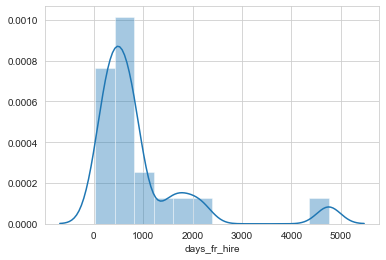

In [40]:
#take quick look, explore more when dealing with feature engineering
sns.distplot(copy["days_fr_hire"], kde=True)

In [41]:
data_prospect.closedate.min()

Timestamp('2015-04-01 00:00:00')

## Create measurement period 03-31-2016 to 03-31-2019

In [42]:
###remove opportunities where close date is before '2016-03-31'
measurement_period = data_prospect['closedate'] > '2016-03-31'

# prospect dataset
data_new_prospect = data_prospect[measurement_period].copy()
print("Size of Prospect Customer Sample", data_new_prospect.shape)

Size of Prospect Customer Sample (31928, 29)


# **Create Opportunity Recency Variables Existing Customer

In [43]:
#recency dataframe 
tx_day_order_e = data_existing[['accountid','firstwindate','inflowdate__c', 'closedate', 'opp_id', 'software_amount__c', 'wonopp']]
tx_day_order_e.head()

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp
0,0014000000FFOT8AAP,2013-06-13,2017-09-26,2018-02-22,0061W00000oga5sQAA,"9,000.00",0
1,0014000000FFPo9AAH,2003-06-20,2017-09-27,2017-11-30,0061W00000oggimQAA,"1,528.66",1
2,0014000000TBI7lAAH,2011-04-21,2017-09-26,2017-10-05,0061W00000ogaVvQAI,"11,063.79",1
3,0014000000ZuWjIAAV,2012-05-09,2017-09-26,2017-10-18,0061W00000ogbwNQAQ,"17,604.15",1
7,0014000000Ov8NrAAJ,2018-03-30,2017-09-27,2018-06-29,0061W00000ogh7SQAQ,"11,347.16",1


In [44]:
#convert Invoice Datetime to day
tx_day_order_e['closedate'] = tx_day_order_e['closedate'].dt.date
tx_day_order_e = tx_day_order_e.sort_values(['accountid','closedate'])

In [45]:
# shift by accountid for get previous close day
tx_day_order_e['PrevCloseDate'] = tx_day_order_e.groupby(['accountid'])['closedate'].shift(1)

#track account with previous opps
tx_day_order_e.loc[tx_day_order_e['accountid']== '0014000000HqPNCAA3'].sort_values(by=['closedate'],ascending=True)

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate
122,0014000000HqPNCAA3,2017-09-22,2017-09-28,2017-11-20,0061W00000ognKKQAY,"2,931.21",0,NaN
1225,0014000000HqPNCAA3,2017-09-22,2017-10-16,2017-11-20,0061W00000ohxUGQAY,"7,842.92",0,2017-11-20
2765,0014000000HqPNCAA3,2017-09-22,2017-11-26,2017-12-29,0061W00000rkl48QAA,"37,160.96",1,2017-11-20


In [46]:
# shift by accountid for get previous wonopp
tx_day_order_e['PrevClosewonopp'] = tx_day_order_e.groupby(['accountid'])['wonopp'].shift(1)

#track account with previous opps
tx_day_order_e.loc[tx_day_order_e['accountid']== '0014000000HqPNCAA3'].sort_values(by=['closedate'],ascending=True)

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,PrevClosewonopp
122,0014000000HqPNCAA3,2017-09-22,2017-09-28,2017-11-20,0061W00000ognKKQAY,"2,931.21",0,NaN,nan
1225,0014000000HqPNCAA3,2017-09-22,2017-10-16,2017-11-20,0061W00000ohxUGQAY,"7,842.92",0,2017-11-20,0.00
2765,0014000000HqPNCAA3,2017-09-22,2017-11-26,2017-12-29,0061W00000rkl48QAA,"37,160.96",1,2017-11-20,0.00


In [47]:
# shift by accountid for get previous close day
tx_day_order_e['PrevCloseAmount'] = tx_day_order_e.groupby(['accountid'])['software_amount__c'].shift(1)

#track account with previous opps
tx_day_order_e.loc[tx_day_order_e['accountid']== '0014000000HqPNCAA3'].sort_values(by=['closedate'],ascending=True)

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,PrevClosewonopp,PrevCloseAmount
122,0014000000HqPNCAA3,2017-09-22,2017-09-28,2017-11-20,0061W00000ognKKQAY,"2,931.21",0,NaN,nan,nan
1225,0014000000HqPNCAA3,2017-09-22,2017-10-16,2017-11-20,0061W00000ohxUGQAY,"7,842.92",0,2017-11-20,0.00,"2,931.21"
2765,0014000000HqPNCAA3,2017-09-22,2017-11-26,2017-12-29,0061W00000rkl48QAA,"37,160.96",1,2017-11-20,0.00,"7,842.92"


In [48]:
tx_day_order_e['PrevCloseWonAmount'] = tx_day_order_e['PrevCloseAmount']*tx_day_order_e['PrevClosewonopp']
#track account with previous opps
tx_day_order_e.loc[tx_day_order_e['accountid']== '0014000000HqPNCAA3'].sort_values(by=['closedate'],ascending=True)

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,PrevClosewonopp,PrevCloseAmount,PrevCloseWonAmount
122,0014000000HqPNCAA3,2017-09-22,2017-09-28,2017-11-20,0061W00000ognKKQAY,"2,931.21",0,NaN,nan,nan,nan
1225,0014000000HqPNCAA3,2017-09-22,2017-10-16,2017-11-20,0061W00000ohxUGQAY,"7,842.92",0,2017-11-20,0.00,"2,931.21",0.00
2765,0014000000HqPNCAA3,2017-09-22,2017-11-26,2017-12-29,0061W00000rkl48QAA,"37,160.96",1,2017-11-20,0.00,"7,842.92",0.00


In [49]:
# create prevous close amounts
tx_day_order_e.loc[(tx_day_order_e['PrevClosewonopp'] == 0)
                 , 
                 'PrevLostAmount' ] = tx_day_order_e['PrevCloseAmount']
tx_day_order_e.loc[tx_day_order_e['accountid']== '0014000000HqPNCAA3'].sort_values(by=['closedate'],ascending=True)

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,PrevClosewonopp,PrevCloseAmount,PrevCloseWonAmount,PrevLostAmount
122,0014000000HqPNCAA3,2017-09-22,2017-09-28,2017-11-20,0061W00000ognKKQAY,"2,931.21",0,NaN,nan,nan,nan,nan
1225,0014000000HqPNCAA3,2017-09-22,2017-10-16,2017-11-20,0061W00000ohxUGQAY,"7,842.92",0,2017-11-20,0.00,"2,931.21",0.00,"2,931.21"
2765,0014000000HqPNCAA3,2017-09-22,2017-11-26,2017-12-29,0061W00000rkl48QAA,"37,160.96",1,2017-11-20,0.00,"7,842.92",0.00,"7,842.92"


In [50]:
#add column for count of days from previous close
tx_day_order_e['dayfromlastddayclose'] = (tx_day_order_e['closedate']-tx_day_order_e['PrevCloseDate'])/ np.timedelta64(1, 'D')
tx_day_order_e.loc[tx_day_order_e['accountid']== '0014000000HqPNCAA3'].sort_values(by=['closedate'],ascending=True)

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,PrevClosewonopp,PrevCloseAmount,PrevCloseWonAmount,PrevLostAmount,dayfromlastddayclose
122,0014000000HqPNCAA3,2017-09-22,2017-09-28,2017-11-20,0061W00000ognKKQAY,"2,931.21",0,NaN,nan,nan,nan,nan,nan
1225,0014000000HqPNCAA3,2017-09-22,2017-10-16,2017-11-20,0061W00000ohxUGQAY,"7,842.92",0,2017-11-20,0.00,"2,931.21",0.00,"2,931.21",0.00
2765,0014000000HqPNCAA3,2017-09-22,2017-11-26,2017-12-29,0061W00000rkl48QAA,"37,160.96",1,2017-11-20,0.00,"7,842.92",0.00,"7,842.92",39.00


In [51]:
tx_day_order_e['has_prev_close'] = (tx_day_order_e['dayfromlastddayclose'] < 365).astype(int)
tx_day_order_e.loc[tx_day_order_e['accountid']== '0014000000HqPNCAA3'].sort_values(by=['closedate'],ascending=True)

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,PrevClosewonopp,PrevCloseAmount,PrevCloseWonAmount,PrevLostAmount,dayfromlastddayclose,has_prev_close
122,0014000000HqPNCAA3,2017-09-22,2017-09-28,2017-11-20,0061W00000ognKKQAY,"2,931.21",0,NaN,nan,nan,nan,nan,nan,0
1225,0014000000HqPNCAA3,2017-09-22,2017-10-16,2017-11-20,0061W00000ohxUGQAY,"7,842.92",0,2017-11-20,0.00,"2,931.21",0.00,"2,931.21",0.00,1
2765,0014000000HqPNCAA3,2017-09-22,2017-11-26,2017-12-29,0061W00000rkl48QAA,"37,160.96",1,2017-11-20,0.00,"7,842.92",0.00,"7,842.92",39.00,1


In [52]:
tx_day_order_e['PrevClose365WonAmount']= tx_day_order_e['has_prev_close']*tx_day_order_e['PrevCloseWonAmount']
tx_day_order_e.loc[tx_day_order_e['accountid']== '0014000000HqPNCAA3'].sort_values(by=['closedate'],ascending=True)

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,PrevClosewonopp,PrevCloseAmount,PrevCloseWonAmount,PrevLostAmount,dayfromlastddayclose,has_prev_close,PrevClose365WonAmount
122,0014000000HqPNCAA3,2017-09-22,2017-09-28,2017-11-20,0061W00000ognKKQAY,"2,931.21",0,NaN,nan,nan,nan,nan,nan,0,nan
1225,0014000000HqPNCAA3,2017-09-22,2017-10-16,2017-11-20,0061W00000ohxUGQAY,"7,842.92",0,2017-11-20,0.00,"2,931.21",0.00,"2,931.21",0.00,1,0.00
2765,0014000000HqPNCAA3,2017-09-22,2017-11-26,2017-12-29,0061W00000rkl48QAA,"37,160.96",1,2017-11-20,0.00,"7,842.92",0.00,"7,842.92",39.00,1,0.00


In [53]:
# create prevous close amounts
tx_day_order_e.loc[(tx_day_order_e['PrevClosewonopp'] == 0)
                 , 
                 'PrevClose365LostAmount' ] = tx_day_order_e['PrevCloseAmount']*tx_day_order_e['has_prev_close']
tx_day_order_e.loc[tx_day_order_e['accountid']== '0014000000HqPNCAA3'].sort_values(by=['closedate'],ascending=True)

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,PrevClosewonopp,PrevCloseAmount,PrevCloseWonAmount,PrevLostAmount,dayfromlastddayclose,has_prev_close,PrevClose365WonAmount,PrevClose365LostAmount
122,0014000000HqPNCAA3,2017-09-22,2017-09-28,2017-11-20,0061W00000ognKKQAY,"2,931.21",0,NaN,nan,nan,nan,nan,nan,0,nan,nan
1225,0014000000HqPNCAA3,2017-09-22,2017-10-16,2017-11-20,0061W00000ohxUGQAY,"7,842.92",0,2017-11-20,0.00,"2,931.21",0.00,"2,931.21",0.00,1,0.00,"2,931.21"
2765,0014000000HqPNCAA3,2017-09-22,2017-11-26,2017-12-29,0061W00000rkl48QAA,"37,160.96",1,2017-11-20,0.00,"7,842.92",0.00,"7,842.92",39.00,1,0.00,"7,842.92"


In [54]:
tx_day_order_e['cum_prev_close_won'] = tx_day_order_e.groupby('accountid')['PrevClosewonopp'].cumsum()
tx_day_order_e.loc[tx_day_order_e['accountid']== '0014000000HqPNCAA3'].sort_values(by=['closedate'],ascending=True)

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,PrevClosewonopp,PrevCloseAmount,PrevCloseWonAmount,PrevLostAmount,dayfromlastddayclose,has_prev_close,PrevClose365WonAmount,PrevClose365LostAmount,cum_prev_close_won
122,0014000000HqPNCAA3,2017-09-22,2017-09-28,2017-11-20,0061W00000ognKKQAY,"2,931.21",0,NaN,nan,nan,nan,nan,nan,0,nan,nan,nan
1225,0014000000HqPNCAA3,2017-09-22,2017-10-16,2017-11-20,0061W00000ohxUGQAY,"7,842.92",0,2017-11-20,0.00,"2,931.21",0.00,"2,931.21",0.00,1,0.00,"2,931.21",0.00
2765,0014000000HqPNCAA3,2017-09-22,2017-11-26,2017-12-29,0061W00000rkl48QAA,"37,160.96",1,2017-11-20,0.00,"7,842.92",0.00,"7,842.92",39.00,1,0.00,"7,842.92",0.00


In [55]:
#change datatype and measure date from inflow to close
tx_day_order_e['inflowdate__c'] = tx_day_order_e['inflowdate__c'].dt.date
tx_day_order_e['dayfrominflow'] = (tx_day_order_e['closedate']-tx_day_order_e['inflowdate__c'])/ np.timedelta64(1, 'D')
tx_day_order_e.loc[tx_day_order_e['accountid']== '0014000000IDHJVAA5'].sort_values(by=['closedate'],ascending=True)

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,PrevClosewonopp,PrevCloseAmount,PrevCloseWonAmount,PrevLostAmount,dayfromlastddayclose,has_prev_close,PrevClose365WonAmount,PrevClose365LostAmount,cum_prev_close_won,dayfrominflow
31293,0014000000IDHJVAA5,2008-12-29,2015-03-10,2015-05-13,0064000000e5rrzAAA,"1,400.00",1,NaN,nan,nan,nan,nan,nan,0,nan,nan,nan,64.00
34967,0014000000IDHJVAA5,2008-12-29,2015-06-18,2015-08-12,0064000000fClviAAC,"50,000.00",0,2015-05-13,1.00,"1,400.00","1,400.00",nan,91.00,1,"1,400.00",nan,1.00,55.00
44957,0014000000IDHJVAA5,2008-12-29,2015-10-20,2015-11-03,0064000000gwhTkAAI,"2,800.00",1,2015-08-12,0.00,"50,000.00",0.00,"50,000.00",83.00,1,0.00,"50,000.00",1.00,14.00
75807,0014000000IDHJVAA5,2008-12-29,2017-03-10,2017-06-08,0064000000naox5AAA,"6,500.00",0,2015-11-03,1.00,"2,800.00","2,800.00",nan,583.00,0,0.00,nan,2.00,90.00
75933,0014000000IDHJVAA5,2008-12-29,2017-03-20,2017-07-17,0064000000nbFWtAAM,"4,832.46",1,2017-06-08,0.00,"6,500.00",0.00,"6,500.00",39.00,1,0.00,"6,500.00",2.00,119.00
86973,0014000000IDHJVAA5,2008-12-29,2017-08-16,2017-08-22,0064000000qtrwEAAQ,"40,000.00",0,2017-07-17,1.00,"4,832.46","4,832.46",nan,36.00,1,"4,832.46",nan,3.00,6.00
85645,0014000000IDHJVAA5,2008-12-29,2017-09-15,2017-11-01,0064000000qCoTJAA0,"73,476.00",0,2017-08-22,0.00,"40,000.00",0.00,"40,000.00",71.00,1,0.00,"40,000.00",3.00,47.00


In [56]:
tx_day_order_e['lostflag'] = (tx_day_order_e['wonopp'] == 0).astype(int)

In [57]:
tx_day_order_e['cum_close_lost'] = tx_day_order_e.groupby('accountid')['lostflag'].cumsum()

In [58]:
tx_day_order_e['cum_prev_close_lost']  = tx_day_order_e.groupby(['accountid'])['cum_close_lost'].shift(1)

In [59]:
tx_day_order_e.loc[tx_day_order_e['accountid']== '0014000000IDHJVAA5'].sort_values(by=['closedate'],ascending=True)

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,PrevClosewonopp,PrevCloseAmount,PrevCloseWonAmount,PrevLostAmount,dayfromlastddayclose,has_prev_close,PrevClose365WonAmount,PrevClose365LostAmount,cum_prev_close_won,dayfrominflow,lostflag,cum_close_lost,cum_prev_close_lost
31293,0014000000IDHJVAA5,2008-12-29,2015-03-10,2015-05-13,0064000000e5rrzAAA,"1,400.00",1,NaN,nan,nan,nan,nan,nan,0,nan,nan,nan,64.00,0,0,nan
34967,0014000000IDHJVAA5,2008-12-29,2015-06-18,2015-08-12,0064000000fClviAAC,"50,000.00",0,2015-05-13,1.00,"1,400.00","1,400.00",nan,91.00,1,"1,400.00",nan,1.00,55.00,1,1,0.00
44957,0014000000IDHJVAA5,2008-12-29,2015-10-20,2015-11-03,0064000000gwhTkAAI,"2,800.00",1,2015-08-12,0.00,"50,000.00",0.00,"50,000.00",83.00,1,0.00,"50,000.00",1.00,14.00,0,1,1.00
75807,0014000000IDHJVAA5,2008-12-29,2017-03-10,2017-06-08,0064000000naox5AAA,"6,500.00",0,2015-11-03,1.00,"2,800.00","2,800.00",nan,583.00,0,0.00,nan,2.00,90.00,1,2,1.00
75933,0014000000IDHJVAA5,2008-12-29,2017-03-20,2017-07-17,0064000000nbFWtAAM,"4,832.46",1,2017-06-08,0.00,"6,500.00",0.00,"6,500.00",39.00,1,0.00,"6,500.00",2.00,119.00,0,2,2.00
86973,0014000000IDHJVAA5,2008-12-29,2017-08-16,2017-08-22,0064000000qtrwEAAQ,"40,000.00",0,2017-07-17,1.00,"4,832.46","4,832.46",nan,36.00,1,"4,832.46",nan,3.00,6.00,1,3,2.00
85645,0014000000IDHJVAA5,2008-12-29,2017-09-15,2017-11-01,0064000000qCoTJAA0,"73,476.00",0,2017-08-22,0.00,"40,000.00",0.00,"40,000.00",71.00,1,0.00,"40,000.00",3.00,47.00,1,4,3.00


## Merge existing customer recency variables with data_prospect dataset

In [60]:
tx_day_order_e.sample(5)

,accountid,firstwindate,inflowdate__c,closedate,opp_id,software_amount__c,wonopp,PrevCloseDate,PrevClosewonopp,PrevCloseAmount,PrevCloseWonAmount,PrevLostAmount,dayfromlastddayclose,has_prev_close,PrevClose365WonAmount,PrevClose365LostAmount,cum_prev_close_won,dayfrominflow,lostflag,cum_close_lost,cum_prev_close_lost
41559,0014000000GGEkTAAX,2007-11-05,2015-11-18,2015-12-03,0064000000gqrp4AAA,"2,691.00",1,2015-04-21,1.00,"8,349.00","8,349.00",nan,226.00,1,"8,349.00",nan,1.00,15.00,0,0,0.00
79262,0014000000G0oymAAB,2007-04-04,2017-02-13,2017-05-10,0064000000nZUOlAAO,"48,208.00",0,2017-02-01,0.00,"9,660.94",0.00,"9,660.94",98.00,1,0.00,"9,660.94",1.00,86.00,1,2,1.00
45955,0014000000nuNgUAAU,2014-08-29,2015-10-13,2015-11-13,0064000000h0QpSAAU,"2,806.00",1,NaN,nan,nan,nan,nan,nan,0,nan,nan,nan,31.00,0,0,nan
76337,0014000001dMDRjAAO,2017-02-22,2017-03-03,2017-03-30,0064000000naSmWAAU,"77,577.24",0,NaN,nan,nan,nan,nan,nan,0,nan,nan,nan,27.00,1,1,nan
23049,0014000000cDWEdAAO,2011-12-26,2018-12-11,2018-12-06,0061W000015PN9lQAG,"2,241.27",1,2017-12-20,1.00,"3,447.43","3,447.43",nan,351.00,1,"3,447.43",nan,3.00,-5.00,0,0,0.00


In [61]:
# data_prospect only includes prospects
rec_data_e = tx_day_order_e[['opp_id', 'PrevClose365WonAmount', 'PrevClose365LostAmount','cum_prev_close_lost', 'cum_prev_close_won',
                            'dayfrominflow']]
data_existing = pd.merge(data_existing, rec_data_e, on='opp_id')
data_existing.loc[data_existing['accountid']== '0014000000IDHJVAA5'].sort_values(by=['closedate'],ascending=True)

,wonopp,opp_id,accountid,opp_createddate,inflowdate__c,closedate,firstwindate,daysfromcreate,stagename,software_amount__c,hasmtnrenewal,acquisitiontype__c,lastupdate,lastforecastcategory,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,numberofemployees,annualrevenue,start_date_at_commvault__c,is_firstwindate,no_firstwindate,cust_model,PrevClose365WonAmount,PrevClose365LostAmount,cum_prev_close_lost,cum_prev_close_won,dayfrominflow
19104,1,0064000000e5rrzAAA,0014000000IDHJVAA5,2015-03-10 11:35:05,2015-03-10,2015-05-13,2008-12-29,64,Closed/Won,"1,400.00",0,Perpetual,2015-05-13 12:06:09.0000000,BestCase,Selection,End User - Customer,Americas,US East,Healthcare,500.00,"160,000,000.00",2014-06-30,0,0,0,nan,nan,nan,nan,64.00
21084,0,0064000000fClviAAC,0014000000IDHJVAA5,2015-06-09 10:29:08,2015-06-18,2015-08-12,2008-12-29,64,Closed / Lost,"50,000.00",0,Perpetual,2015-06-22 17:18:37.0000000,Pipeline,Needs Analysis,End User - Customer,Americas,US East,Healthcare,500.00,"160,000,000.00",2014-06-30,0,0,0,"1,400.00",nan,0.00,1.00,55.00
26702,1,0064000000gwhTkAAI,0014000000IDHJVAA5,2015-10-19 16:28:08,2015-10-20,2015-11-03,2008-12-29,15,Closed/Won,"2,800.00",0,Perpetual,2015-11-04 12:28:43.0000000,BestCase,Selection,End User - Customer,Americas,US East,Healthcare,500.00,"160,000,000.00",2014-03-03,0,0,0,0.00,"50,000.00",1.00,1.00,14.00
43640,0,0064000000naox5AAA,0014000000IDHJVAA5,2017-03-10 17:02:51,2017-03-10,2017-06-08,2008-12-29,90,Closed / Lost,"6,500.00",0,Perpetual,2017-06-02 09:19:57.0000000,Pipeline,Qualifying,End User - Customer,Americas,US East,Healthcare,500.00,"160,000,000.00",2014-03-03,0,0,0,0.00,nan,1.00,2.00,90.00
43724,1,0064000000nbFWtAAM,0014000000IDHJVAA5,2017-03-20 09:41:49,2017-03-20,2017-07-17,2008-12-29,119,Closed/Won,"4,832.46",0,Perpetual,2017-07-17 15:35:03.0000000,Pipeline,Needs Analysis,End User - Customer,Americas,US East,Healthcare,500.00,"160,000,000.00",2014-03-03,0,0,0,0.00,"6,500.00",2.00,2.00,119.00
49453,0,0064000000qtrwEAAQ,0014000000IDHJVAA5,2017-08-16 15:23:31,2017-08-16,2017-08-22,2008-12-29,6,Closed / Lost,"40,000.00",0,Perpetual,2017-08-16 15:25:14.0000000,Pipeline,Qualifying,End User - Customer,Americas,US East,Healthcare,500.00,"160,000,000.00",2017-04-03,0,0,0,"4,832.46",nan,2.00,3.00,6.00
48753,0,0064000000qCoTJAA0,0014000000IDHJVAA5,2017-09-15 12:46:19,2017-09-15,2017-11-01,2008-12-29,47,Closed / Lost,"73,476.00",0,Perpetual,2017-09-27 18:11:24.0000000,BestCase,Selection,End User - Customer,Americas,US East,Healthcare,500.00,"160,000,000.00",2014-09-02,0,0,0,0.00,"40,000.00",3.00,3.00,47.00


In [62]:
# create feature days_fr_hire to measure days from salespersons start
data_existing['days_fr_hire'] = (data_existing['closedate']-data_existing['start_date_at_commvault__c'])/ np.timedelta64(1, 'D')

In [63]:
data_existing.head()

,wonopp,opp_id,accountid,opp_createddate,inflowdate__c,closedate,firstwindate,daysfromcreate,stagename,software_amount__c,hasmtnrenewal,acquisitiontype__c,lastupdate,lastforecastcategory,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,numberofemployees,annualrevenue,start_date_at_commvault__c,is_firstwindate,no_firstwindate,cust_model,PrevClose365WonAmount,PrevClose365LostAmount,cum_prev_close_lost,cum_prev_close_won,dayfrominflow,days_fr_hire
0,0,0061W00000oga5sQAA,0014000000FFOT8AAP,2017-09-26 14:00:18,2017-09-26,2018-02-22,2013-06-13,149,Closed / Lost,"9,000.00",0,Perpetual,2018-02-08 13:36:09.0000000,Pipeline,Qualifying,End User - Customer,Americas,Canada,Manufacturing,200.00,"11,667,786.00",2011-11-07,0,0,0,0.00,"4,500.00",3.00,0.00,149.00,"2,299.00"
1,1,0061W00000oggimQAA,0014000000FFPo9AAH,2017-09-27 10:58:02,2017-09-27,2017-11-30,2003-06-20,64,Closed/Won,"1,528.66",0,Perpetual,2017-11-30 15:07:14.0000000,BestCase,Selection,End User - Customer,Americas,Canada,Transportation,"1,900.00","450,000,000.00",2011-11-07,0,0,0,0.00,0.00,1.00,0.00,64.00,"2,215.00"
2,1,0061W00000ogaVvQAI,0014000000TBI7lAAH,2017-09-26 14:42:44,2017-09-26,2017-10-05,2011-04-21,9,Closed/Won,"11,063.79",0,Perpetual,2017-10-05 13:36:04.0000000,BestCase,Selection,End User - Customer,Americas,US West & LATAM,Banking & Insurance,"1,200.00",0.00,2015-06-22,0,0,0,"11,063.79",nan,0.00,2.00,9.00,836.00
3,1,0061W00000ogbwNQAQ,0014000000ZuWjIAAV,2017-09-26 17:12:34,2017-09-26,2017-10-18,2012-05-09,22,Closed/Won,"17,604.15",0,Perpetual,2017-10-18 11:33:54.0000000,BestCase,Selection,End User - Customer,Americas,US West & LATAM,Healthcare,"1,600.00","369,025,810.00",2010-10-04,0,0,0,"62,804.00",nan,1.00,3.00,22.00,"2,571.00"
4,1,0061W00000ogh7SQAQ,0014000000Ov8NrAAJ,2017-09-27 11:37:16,2017-09-27,2018-06-29,2018-03-30,275,Closed/Won,"11,347.16",0,Perpetual,2018-05-11 04:02:00.0000000,BestCase,Selection,End User - Customer,EMEA,Global Enterprise,Other,"84,316.00","12,690,000,000.00",2009-07-06,0,0,0,"3,654.94",nan,0.00,1.00,275.00,"3,280.00"


## Create measurement period 03-31-2016 to 03-31-2019

In [64]:
###remove opportunities where close date is before '2016-03-31'
measurement_period = data_existing['closedate'] > '2016-03-31'

# existing dataset
data_existing = data_existing[measurement_period].copy()
print("Size of Existing Customer Sample", data_existing.shape)

Size of Existing Customer Sample (40474, 31)


In [65]:
data_existing.columns

Index(['wonopp', 'opp_id', 'accountid', 'opp_createddate', 'inflowdate__c', 'closedate', 'firstwindate', 'daysfromcreate', 'stagename', 'software_amount__c',
       'hasmtnrenewal', 'acquisitiontype__c', 'lastupdate', 'lastforecastcategory', 'laststagename', 'relationshiptype_text__c', 'reportinglevel0__c',
       'reportinglevel1__c', 'industry', 'numberofemployees', 'annualrevenue', 'start_date_at_commvault__c', 'is_firstwindate', 'no_firstwindate',
       'cust_model', 'PrevClose365WonAmount', 'PrevClose365LostAmount', 'cum_prev_close_lost', 'cum_prev_close_won', 'dayfrominflow', 'days_fr_hire'],
      dtype='object')

# save datasets to python pickle to use in separate notebooks for each model

In [66]:
data_existing.to_pickle('data_existing')

data_prospect.to_pickle('data_prospect')

In [67]:
data_existing.shape

(40474, 31)

In [68]:
data_prospect.shape

(40536, 29)

In [69]:
40536+40474

81010